Jared Crebo 30085839

PHYS 381: Assignment 2

The Pendulum problem

7 (Exercise) Implementing Runge-Kutta method

This script models the swing of a pendulum via the nonlinear pendulum equation, which is solved numerically through the fourth-order Runge-Kutta algorithm. 

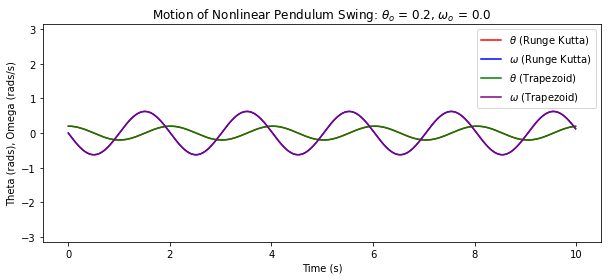

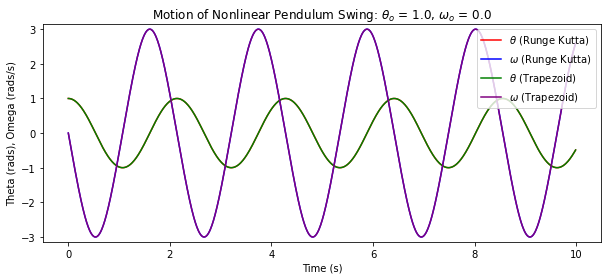

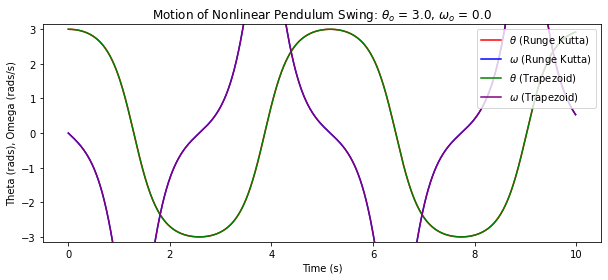

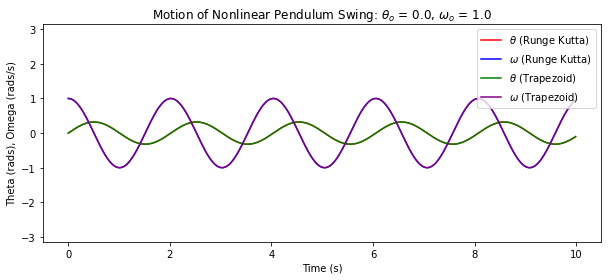

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import math

g  = 9.81 # Acceleration of gravity (m/s^2)
L = 1 # Length of pendulum (m)
k = 0.0 # Stiffness coefficient (N/rad)
A = 0.0 # driving force amplitude (N)
phi = 0.66667 # driving force frequency (rad/s)

def f_nonlin(theta, omega, t):
    '''
    Equation of motion of a nonlinear pendulum
    t - current time in seconds
    theta - current angle in rads
    omega - current angular velocity in rads/sec
    Function returns the angular acceleration of the current timestep
    '''
    return -g/L * math.sin(theta) - k*omega + A*math.cos(phi * t)

def plot_nonlinear_pendulum(theta1, omega1):
    '''
    Main solver function
    theta1 - initial angle in rads
    omega1 - intial angular velocity in rads/sec
    Function takes the initial conditions and returns a plot of the angle and angular velocity of the pendulum wrt time
    '''
    # Initialize arrays to store angle, angular velocity, and time for plotting both the trapezoid rule and Runge Kutta method solutions
    theta_runge = np.zeros(1000)
    omega_runge = np.zeros(1000)
    theta_trap = np.zeros(1000)
    omega_trap = np.zeros(1000)
    t = np.zeros(1000)

    # Initialize first index of array to the initial conditions
    theta_runge[0] = theta1
    omega_runge[0] = omega1
    theta_trap[0] = theta1
    omega_trap[0] = omega1
    t[0] = 0.0
    # Set the timestep value (s)
    dt = 0.01

    for i in range(0,999,1):
        # For each current timestep, calculate the next angle and angular velocity of the pendulum based on data from the current timestep

        # Trapezoid Rule
        theta_trap[i+1] = theta_trap[i] + dt/2*omega_trap[i] + dt/2*(omega_trap[i] + dt*f_nonlin(theta_trap[i], omega_trap[i], t[1]))
        omega_trap[i+1] = omega_trap[i] + dt/2*f_nonlin(theta_trap[i], omega_trap[i], t[i]) + dt/2*f_nonlin(theta_trap[i+1], omega_trap[i]+dt*f_nonlin(theta_trap[i],omega_trap[i],t[i]), t[i+1])

        # Fourth Order Runge Kutta Method
        k1a = dt * omega_runge[i]
        k1b = dt * f_nonlin(theta_runge[i], omega_runge[i], t[i])
        k2a = dt * (omega_runge[i] + k1b/2)
        k2b = dt * f_nonlin(theta_runge[i] + k1a/2, omega_runge[i] + k1b/2, t[i] + dt/2)
        k3a = dt * (omega_runge[i] + k2b/2)
        k3b = dt * f_nonlin(theta_runge[i] + k2a/2, omega_runge[i] + k2b/2, t[i] + dt/2)
        k4a = dt * (omega_runge[i] + k3b)
        k4b = dt * f_nonlin(theta_runge[i] + k3a, omega_runge[i] + k3b, t[i] + dt)
        theta_runge[i+1] = theta_runge[i] + (k1a + 2 * k2a + 2 * k3a + k4a) / 6
        omega_runge[i+1] = omega_runge[i] + (k1b + 2 * k2b + 2 * k3b + k4b) / 6

        t[i+1] = t[i] + dt

    # Initialize figure for plotting
    fig, ax = plt.subplots(figsize=[10,4])
    ax.plot(t,theta_runge,color='red',label='$\\theta$ (Runge Kutta)') # plot angle vs time from Runge Kutta Method
    ax.plot(t,omega_runge,color='blue',label='$\omega$ (Runge Kutta)') # plot angular velocity vs time from Runge Kutta Method
    ax.plot(t,theta_trap,color='green',label='$\\theta$ (Trapezoid)') # plot angle vs time from Trapezoid Rule
    ax.plot(t,omega_trap,color='purple',label='$\omega$ (Trapezoid)') # plot angular velocity vs time from Trapezoid Rule
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Theta (rads), Omega (rads/s)")
    ax.set_title("Motion of Nonlinear Pendulum Swing: $\\theta_o$ = " + str(theta1) + ", $\omega_o$ = " + str(omega1))
    ax.set_ylim((-math.pi, math.pi))
    ax.legend(loc='upper right')

# Plot the motion of a nonlinear pendulum with the initial conditions (theta, omega)
plot_nonlinear_pendulum(0.2, 0.0)
plot_nonlinear_pendulum(1.0, 0.0)
plot_nonlinear_pendulum(3.0, 0.0)
plot_nonlinear_pendulum(0.0, 1.0)